# Instructions
This assignment should be completed individually and handed in before 10
p.m. on the 4th of April. This assignment is not graded, but obligatory. If you cannot solve each task perfectly, that’s fine. Nevertheless, you are
expected to make an effort to solve all of them. The aim is to practice Julia
while getting acquainted with an important dataset you’ll use for graded
assignments and that some papers in the reading list are based on.You can either hand in a .jl or a .ipynb file. In any case, codes should be easy
to follow and commented (i.e. write down in comments what you do, especially
if not obvious. Good comments are short and clear). This time you are not
required to write about the economic interpretation of any results. The questions below concern a dataset. This means that nearly all tasks could
be solved by some one-line, specialized command by someone knowing the
DataFrames package very well. Obviously, I don’t expect you to spend your
time searching for these online. Use Julia basics instead, such as for loops,
logical indexing, etc. Regarding DataFrames, the contents of the updated
8_dataframes.jl should be more than sufficient.

# PSID
PSID1 is a unique panel dataset following families in the US since 1968. Since
then children have grown up and started their own families. Sometimes families
break up and new ones are formed. Sometimes a person moves into an existing household or moves out. To solve some tasks in this (and future) assignment(s),
you should know how PSID is trying to keep track of all this.
  -  Every record (row) corresponds to one individual in one particular year.
  - id_ind uniquely identifies a person across time
  - id_family identifies a family (household) within a particular year. It
is not possible to have a stable family identifier over time, since families
change.
  - famid_1968 is the id_family of the family in 1968 because of which the
particular person is in the sample. This is stable over time. For example,
if a family gets id_family 5 in 1968, all members of this family will have
5 as their famid_1968 forever. If there is a son in this family, who then
grows up and gets married, his spouse will also get the same famid_1968
as him, just as their children, and so on. Nevertheless, they will have a
different id_family from the son’s parents (and these will change every
year).

In [1]:
using CSV, DataFrames
psid = DataFrame(CSV.File("psid.csv")) # read psid file
@show describe(psid) # check summary
nrow(psid) # check row dimension

describe(psid) = 19×7 DataFrame
 Row │ variable            mean       min                                median   max                                nmissing  eltype
     │ Symbol              Union…     Any                                Union…   Any                                Int64     Type
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ id_ind              1.50363e6  1001                               1.537e6  2930001                                   0  Int64
   2 │ famid_1968          1503.57    1                                  1537.0   2930                                      0  Int64
   3 │ year                1993.1     1968                               1992.0   2021                                      0  Int64
   4 │ id_family           3513.86    1                                  3217.0   16968                                     0  Int64
   5 │ rel_head   

281240

# Tasks

1. There is already a family-level variable for expenditure and net wealth. Create
one for income as well and call it labor_inc_family (Hint: labor_inc is never
missing, but labor_inc_spouse is missing if there is no spouse).

In [2]:
psid.labor_inc_family = psid.labor_inc + coalesce.(psid.labor_inc_spouse, 0) # replace missing labor_inc_spouse with 0s, note row dimension matches

281240-element Vector{Float64}:
   5614.0
      0.0
      0.0
   3280.0
   7900.0
   6268.0
   8743.0
   9677.0
      0.0
   6300.0
      ⋮
 119344.0
   6246.0
  85377.0
      0.0
  29900.0
      0.0
      0.0
  25000.0
  20750.0

2. Drop all individuals, who are not head (because we’ll work only with family-
level variables).

In [3]:
psid_head = psid[psid.rel_head .== "head", :] # keep rows where rel_head is head
nrow(psid_head)< nrow(psid) # check if psid_head has less observations than psid

true

3. Keep only the following columns: id_ind, year, family_comp_change, labor_inc_family,
expenditure_family and net_wealth_family.

In [4]:
psid_head = psid_head[:, [:id_ind, :year, :family_comp_change, :labor_inc_family, :expenditure_family, :net_wealth_family]] # subset columns
names(psid_head)    # check column names

6-element Vector{String}:
 "id_ind"
 "year"
 "family_comp_change"
 "labor_inc_family"
 "expenditure_family"
 "net_wealth_family"

4. For each year when PSID collected data, compute the cross-sectional mean
and variance of income and expenditure (Note that the expenditure series
starts in 1999).

In [5]:
using  Statistics

# create mean and variance series for labor_inc_family and expenditure_family
psid_head_mean = combine(groupby(psid_head, :year), :labor_inc_family => mean, :expenditure_family => mean)
psid_head_var = combine(groupby(psid_head, :year), :labor_inc_family => var, :expenditure_family => var)

Row,year,labor_inc_family_var,expenditure_family_var
,Int64,Float64,Float64?
1,1968,3.61585e7,missing
2,1969,4.20021e7,missing
3,1970,4.87842e7,missing
4,1971,5.58664e7,missing
5,1972,5.95849e7,missing
6,1973,7.02551e7,missing
7,1974,8.39603e7,missing
8,1975,1.02196e8,missing
9,1976,1.10321e8,missing


5. Plot the series over time. Put the two mean series on one plot together, and
the two variance series on another one. Try to make it somewhat nice (at
least informative labels for everything as done on some plots in the numerics
notebook).

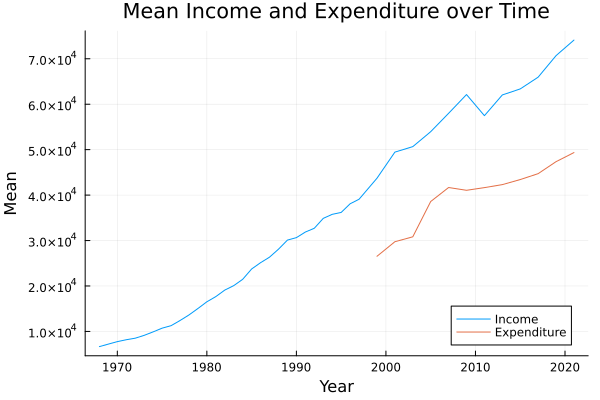

In [6]:
using Plots

plot(psid_head_mean.year, [psid_head_mean.labor_inc_family_mean, psid_head_mean.expenditure_family_mean], label = ["Income" "Expenditure"], xlabel = "Year", ylabel = "Mean", title = "Mean Income and Expenditure over Time") # plot mean series

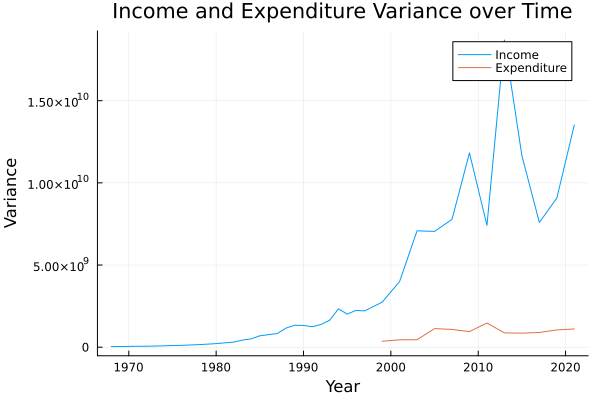

In [7]:
plot(psid_head_var.year, [psid_head_var.labor_inc_family_var, psid_head_var.expenditure_family_var], label = ["Income" "Expenditure"], xlabel = "Year", ylabel = "Variance", title = "Income and Expenditure Variance over Time") # plot variance series

6. Drop all years before 1999, since we will work with expenditures (Note that after
1997 PSID is biannual). In addition, keep only households whose composition
did not change since the last interview (keep only if family_comp_change
variable equals 0).

In [8]:
psid_head = psid_head[psid_head.year .>= 1999, :] # year drop
psid_head = psid_head[psid_head.family_comp_change .== 0, :] # keep constant family composition
names(psid_head) # check column names

6-element Vector{String}:
 "id_ind"
 "year"
 "family_comp_change"
 "labor_inc_family"
 "expenditure_family"
 "net_wealth_family"

7. At the end of 8_dataframes.jl I show how to create a column with 1-year
lagged values of an existing column in psid, when data is annual. Try to
make this piece of code into a function that works for biannual data (like the
after-1997 part of PSID). The function should take the following inputs:
- the dataframe to modify (in the script that was psid)
- name of the column identifying individuals (that was "id_ind")
- name of the column referring to time (that was "year")
- name of the column that you want to lag (that was "labor_inc")
It should return the original dataset with an additional column that contains the
values lagged by two years. The new column should be named "laggedcol_lag_2"
where laggedcol is the name of the column you take the lag of.

In [9]:
function lag2(df, id, t, var)
    #1. sort by id and year (reverse)
    sort!(df, [id, order(t, rev = true)])
    # 2. initialize new variable
    df[!,string(var) * "_lag2"] = missings(Float64, size(df,1))
    # for every row, check if second next row actually represents the very same person in the second lagged year.
        # if yes, set labor_inc_lag to labor_inc from second next row
        # otherwise do nothing
    for i in 1:(size(df,1)-2) 
        if df[i,id] == df[i+2,id] && df[i,t] == df[i+1,t] + 2 # should be the same person AND the previous year
            df[i,string(var) * "_lag2"] = df[i+2,var]
        end
    end
    return df
end

lag2 (generic function with 1 method)

8. Using this function, add columns with the two-year lags of income, net wealth
and expenditure. Using the lags, create a column containing changes relative
to two years before for all three variables.

In [10]:
# add columns with lags 
psid_head = lag2(psid_head, :id_ind, :year, :labor_inc_family)
psid_head = lag2(psid_head, :id_ind, :year, :net_wealth_family)
psid_head = lag2(psid_head, :id_ind, :year, :expenditure_family)
# create delta columns
psid_head.labor_inc_family_d2 = psid_head.labor_inc_family - psid_head.labor_inc_family_lag2
psid_head.net_wealth_family_d2 = psid_head.net_wealth_family - psid_head.net_wealth_family_lag2
psid_head.expenditure_family_d2 = psid_head.expenditure_family - psid_head.expenditure_family_lag2
describe(psid_head) # check summary

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,Type
1,id_ind,1.5101e6,4003,1.54103e6,2927172,0,Int64
2,year,2010.28,1999,2011.0,2021,0,Int64
3,family_comp_change,0.0,0,0.0,0,0,"Union{Missing, Int64}"
4,labor_inc_family,59622.4,0.0,41000.0,6.3e6,0,Float64
5,expenditure_family,39718.1,-237.41,33460.3,1.00625e6,0,"Union{Missing, Float64}"
6,net_wealth_family,4.42932e5,-3.197e6,106000.0,1.00555e8,17035,"Union{Missing, Float64}"
7,labor_inc_family_lag2,56951.4,0.0,40800.0,3.5e6,18773,"Union{Missing, Float64}"
8,net_wealth_family_lag2,4.65478e5,-2.02528e6,114000.0,1.0047e8,30320,"Union{Missing, Float64}"
9,expenditure_family_lag2,37641.4,0.0,31792.8,1.00625e6,18773,"Union{Missing, Float64}"


9. Compute the correlation of changes in income with changes in expenditure;
and of changes in income with changes in net wealth.

In [19]:
# 1. select columns of interest
# 2. drop all rows including any 'missing's
# 3. turn the resulting DataFrame into an Array (that's what cor needs as an input)
# 4. cor gives you the correlation matrix. we need to call over rows (dim 1), since rows represent the indviduals.
@show DataFrame(cor(Matrix(dropmissing(psid_head[:,["labor_inc_family_d2", "expenditure_family_d2", "net_wealth_family_d2"]])), dims = 1), :auto)
# extract the correlation between labor_inc_family_d2 and expenditure_family_d2
println("cor(\u0394income, \u0394expenditure) = $(cor(Matrix(dropmissing(psid_head[:,["labor_inc_family_d2", "expenditure_family_d2"]])), dims = 1)[1,2])")
println("cor(\u0394income, \u0394net wealth) = $(cor(Matrix(dropmissing(psid_head[:,["labor_inc_family_d2", "net_wealth_family_d2"]])), dims = 1)[1,2])")

DataFrame(cor(Matrix(dropmissing(psid_head[:, ["labor_inc_family_d2", "expenditure_family_d2", "net_wealth_family_d2"]])), dims = 1), :auto) = 3×3 DataFrame
 Row │ x1         x2         x3
     │ Float64    Float64    Float64
─────┼─────────────────────────────────
   1 │ 1.0        0.138057   0.0145289
   2 │ 0.138057   1.0        0.0385869
   3 │ 0.0145289  0.0385869  1.0
cor(Δincome, Δexpenditure) = 0.13384207303988113
cor(Δincome, Δnet wealth) = 0.014528919596169112
